# Proyek Klasifikasi Gambar: Language Gesture Detection
- **Nama:** M.TOFIK HIDAYAT
- **Email:** topikhidayat17081998@gmail.com
- **ID Dicoding:** tofikhidayat123

## Import Semua Packages/Library yang Digunakan

In [3]:
!pip install keras
!pip install tensorflow --upgrade
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 108.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

import os
import shutil
import io
from PIL import Image
from google.colab import files
from re import sub


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from keras.models import load_model
import tensorflowjs as tfjs

import zipfile
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

### Data Loading

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Dataset_Detection_Generator/Gesture Image Data/'
target_size = (100, 100)
clases = 37

#### Split Dataset & Data Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=32,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical',
    subset='training')

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation')

Found 8080 images belonging to 37 classes.
Found 2020 images belonging to 37 classes.


In [ ]:
class_folders = os.listdir(data_dir)

for class_folder in class_folders:
  class_path = os.path.join(data_dir, class_folder)
  if os.path.isdir(class_path):
    image_files = os.listdir(class_path)

    plt.figure(figsize=(10, 5))
    for i in range(min(5, len(image_files))):
      image_path = os.path.join(class_path, image_files[i])
      img = mpimg.imread(image_path)
      plt.subplot(1, 5, i + 1)
      plt.imshow(img)
      plt.axis('off')
    plt.suptitle(f"Class: {class_folder}")
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Modelling

In [ ]:
# Model definition
model = Sequential([
    Conv2D(32, (3, 3),strides=1, activation='relu',padding='same', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'),

    Conv2D(64, (3, 3), activation='relu',strides=1, padding='same'),
    MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'),

    Conv2D(128, (3, 3), activation='relu',strides=1, padding='same' ),
    MaxPooling2D(pool_size=(2, 2),strides=1, padding='same'),

    Flatten(),
    Dense(256),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(37, activation='softmax')
])

# Optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

# Model training
history = model.fit(train_generator, epochs=15, validation_data=val_generator, callbacks=callbacks)

# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(val_generator)
print('Validation loss:', val_loss)
print('Validation accuracy:', val_acc)

Epoch 1/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.1250 - loss: 3.2690 - val_accuracy: 0.8267 - val_loss: 0.8181 - learning_rate: 1.0000e-04
Epoch 2/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 445s 2s/step - accuracy: 0.6783 - loss: 1.1017 - val_accuracy: 0.9208 - val_loss: 0.2838 - learning_rate: 1.0000e-04
Epoch 3/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.8468 - loss: 0.5069 - val_accuracy: 0.9589 - val_loss: 0.1547 - learning_rate: 1.0000e-04
Epoch 4/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - accuracy: 0.9125 - loss: 0.3016 - val_accuracy: 0.9564 - val_loss: 0.1412 - learning_rate: 1.0000e-04
Epoch 5/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.9358 - loss: 0.1932 - val_accuracy: 0.9639 - val_loss: 0.1059 - learning_rate: 1.0000e-04
Epoch 6/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - accuracy: 0.9559 - loss: 0.1399 - val_accuracy: 0.9738 - val_loss: 0.0783 - learning_rate: 1.0000e-04
Epoch 7/15
253/253 ━━━━━━━━━━━━━━━━━━━━ 434s 1s/step - acc

## Evaluasi dan Visualisasi

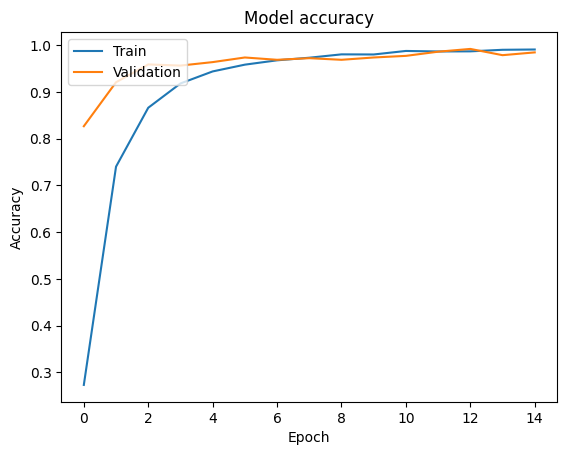

In [ ]:
# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

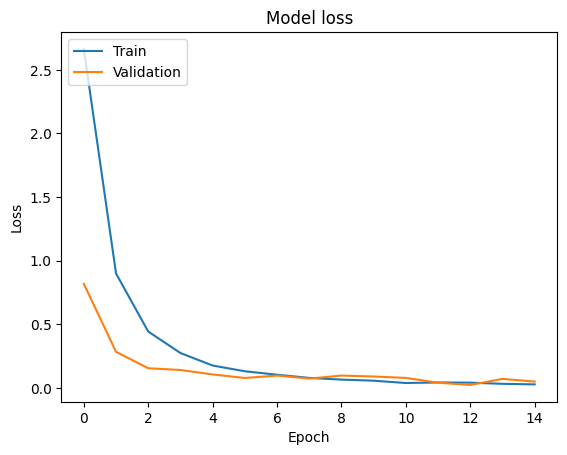

In [ ]:
# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Konversi Model

In [ ]:
# Simpan model dalam format SavedModel
model.export('/content/drive/MyDrive/Colab Notebooks/DBS_Gesture_Detection/saved_model/')

Saved artifact at '/content/drive/MyDrive/Colab Notebooks/DBS_Gesture_Detection/saved_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 37), dtype=tf.float32, name=None)
Captures:
  138337236851824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138337236847072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138337236849536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138337236850240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138337236845840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138337236846016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138337236846368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138337236859040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138337206611360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138337206610656: TensorSpe

In [ ]:
# Convert the model to TF Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model to Google Drive
tflite_path = '/content/drive/MyDrive/Colab Notebooks/DBS_Gesture_Detection/tflite/model.tflite'
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpuapow4lh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='keras_tensor_45')
Output Type:
  TensorSpec(shape=(None, 37), dtype=tf.float32, name=None)
Captures:
  138885131369312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138885131369136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138885131362976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138885131356816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138885131356288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138885131364560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138885131367552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138885131355408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138885131366144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138885131364032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1388851313

In [ ]:
# Load your trained TensorFlow model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DBS_Gesture_Detection/saved_model/best_model.h5')  # Replace with your model path

# Convert the model to TFJS format
tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/Colab Notebooks/DBS_Gesture_Detection/tfjs_model')

print("Model converted to TFJS format successfully!")

failed to lookup keras version from the file,
    this is likely a weight only file
Model converted to TFJS format successfully!


## Inference (optional)

Saving 11.jpg to 11.jpg


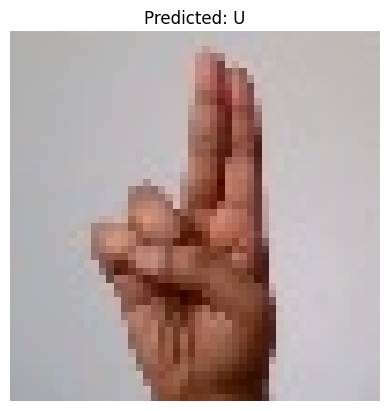

In [6]:
def load_model_saved_model(model_path):
    return tf.keras.layers.TFSMLayer(model_path, call_endpoint='serving_default')

# Load the SavedModel using TFSMLayer in Keras 3
model = load_model_saved_model('/content/drive/MyDrive/Colab Notebooks/DBS_Gesture_Detection/saved_model')


data_dir = '/content/drive/MyDrive/Dataset_Detection_Generator/Gesture Image Data'

class_folders = os.listdir(data_dir)
class_folders.sort()

class_names = [folder for folder in class_folders if os.path.isdir(os.path.join(data_dir, folder))]

# Upload gambar
uploaded = files.upload()
for fn in uploaded.keys():
    path = fn

    img = image.load_img(path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    classes = model(x)
    pred_values = classes['output_0'].numpy()

    predicted_class = np.argmax(pred_values, axis=1)[0]

    if predicted_class < len(class_names):
        predicted_class_name = class_names[predicted_class]
    else:
        predicted_class_name = 'Unknown'

    # Menampilkan gambar dengan hasil prediksi
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name}")
    plt.axis('off')
    plt.show()